In [1]:
import numpy as np
import pandas as pd

# UFO Sightings Analysis

This project explores the UFO Sightings dataset from Maven Analytic’s [Data Playground](https://www.mavenanalytics.io/data-playground). 

The dataset consists of 80,000+ rows of records each representing a UFO sighting from 1909 to 2014 and containing information about the city, state, country, coordinates, shape, duration, etc. 

## Data Loading

In [2]:
ufo = pd.read_csv('ufo_sightings_scrubbed.csv') # As-is from Maven Analytics

ufo

C:\Users\chery\AppData\Local\Temp\ipykernel_15364\759100750.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo = pd.read_csv('ufo_sightings_scrubbed.csv') # As-is from Maven Analytics


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


## Data Cleaning & Transforming

Used a `for` loop to change the column names in each DataFrame to lowercase and snake case.

In [3]:
df_list = [ufo]

for df in df_list:
    df.rename(columns=lambda col: col.replace(' ', '_').lower(), inplace=True)

Utilized `.head()`, `.shape`, `.info()`, and `.describe()` to familiarize myself with the data.

In [4]:
ufo.head()
ufo.info()
ufo.describe()
ufo.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration_(seconds)    80332 non-null  object 
 6   duration_(hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date_posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude_            80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


(80332, 11)

I am going to focus my analysis on UFO sightings that occurred in the United States. Created a new DataFrame called `ufo_us` which includes all rows where the `country` is 'us.' (80332 rows -> 65114 rows)

In [5]:
ufo_us = ufo[ufo['country'] == 'us'].reset_index(drop = True)

ufo_us

,datetime,city,state,country,shape,duration_(seconds),duration_(hours/min),comments,date_posted,latitude,longitude_
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
2,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611
3,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595,-82.188889
4,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,1999-10-02,41.1175,-73.408333
...,...,...,...,...,...,...,...,...,...,...,...
65109,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
65110,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
65111,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
65112,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


To narrow down the DataFrame even further, I created a list of the 50 states and am overwiting the `ufo_us` DataFrame where values in the `state` column are in the list of states. (65114 rows -> 65082 rows)

In [6]:
states = ['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'fl', 'ga', 'hi', 'id', 'il', 'in', 'ia', 'ks'
          , 'ky', 'la', 'me', 'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 'nm', 'ny'
          , 'nc', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'vt', 'va', 'wa', 'wv'
          , 'wi', 'wy']

ufo_us = ufo_us[ufo_us['state'].isin(states) == True]

ufo_us

,datetime,city,state,country,shape,duration_(seconds),duration_(hours/min),comments,date_posted,latitude,longitude_
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
2,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611
3,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595,-82.188889
4,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,1999-10-02,41.1175,-73.408333
...,...,...,...,...,...,...,...,...,...,...,...
65109,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
65110,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
65111,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
65112,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


 Created a new column called `state_full` which is the non-abbreviated version of `state`.

In [9]:
import warnings
warnings.filterwarnings('ignore')

ufo_us['state_full'] = ufo_us['state'].replace('al', 'Alabama').replace('ak', 'Alaska').replace('az', 'Arizona').replace('ar', 'Arkansas').replace('ca', 'California').replace('co', 'Colorado').replace('ct', 'Connecticut').replace('de', 'Delaware').replace('fl', 'Florida').replace('ga', 'Georgia').replace('hi', 'Hawaii').replace('id', 'Idaho').replace('il', 'Illinois').replace('in', 'Indiana').replace('ia', 'Iowa').replace('ks', 'Kansas').replace('ky', 'Kentucky').replace('la', 'Louisiana').replace('me', 'Maine').replace('md', 'Maryland').replace('ma', 'Massachusetts').replace('mi', 'Michigan').replace('mn', 'Minnesota').replace('ms', 'Mississippi').replace('mo', 'Missouri').replace('mt', 'Montana').replace('ne', 'Nebraska').replace('nv', 'Nevada').replace('nh', 'New Hampshire').replace('nj', 'New Jersey').replace('nm', 'New Mexico').replace('ny', 'New York').replace('nc', 'North Carolina').replace('nd', 'North Dakota').replace('oh', 'Ohio').replace('ok', 'Oklahoma').replace('or', 'Oregon').replace('pa', 'Pennsylvania').replace('ri', 'Rhode Island').replace('sc', 'South Carolina').replace('sd', 'South Dakota').replace('tn', 'Tennessee').replace('tx', 'Texas').replace('ut', 'Utah').replace('vt', 'Vermont').replace('va', 'Virginia').replace('wa', 'Washington').replace('wv', 'West Virginia').replace('wi', 'Wisconsin').replace('wy', 'Wyoming')

Created new columns `date`, `year`, and `month` from the `datetime` column.

In [10]:
ufo_us['date'] = pd.to_datetime(ufo_us['datetime']).dt.date
ufo_us['year'] = ufo_us['date'].astype(str).str[:4]
ufo_us['month'] = ufo_us['date'].astype('str').str[5:7]

Created a new column called `month_full` which is the name of the month rather than the numeric value seen in `month`.

In [11]:
ufo_us['month_full'] = ufo_us['month'].replace('01', 'January').replace('02', 'February').replace('03', 'March').replace('04', 'April').replace('05', 'May').replace('06', 'June').replace('07', 'July').replace('08', 'August').replace('09', 'September').replace('10', 'October').replace('11', 'November').replace('12', 'December')

The `comments` column includes HTML character codes rather than the characters themselves. Replaced the code with their respective characters.

In [12]:
ufo_us['comments'] = ufo_us['comments'].str.replace('&#32',' ').str.replace('&#33','!').str.replace('&#34','"').str.replace('&#35','#').str.replace('&#36','$').str.replace('&#37','%').str.replace('&#38','&').str.replace('&#39',"\'").str.replace('&#40','(').str.replace('&#41',')').str.replace('&#42','*').str.replace('&#43','+').str.replace('&#44',',').str.replace('&#45','-').str.replace('&#46','.').str.replace('&#47','/').str.replace('&#48','0').str.replace('&#49','1').str.replace('&#50','2').str.replace('&#51','3').str.replace('&#52','4').str.replace('&#53','5').str.replace('&#54','6').str.replace('&#55','7').str.replace('&#56','8').str.replace('&#57','9').str.replace('&#58',':').str.replace('&#59',';').str.replace('&#60','<').str.replace('&#61','=').str.replace('&#62','>').str.replace('&#63','?').str.replace('&#64','@').str.replace('&#65','A').str.replace('&#66','B').str.replace('&#67','C').str.replace('&#68','D').str.replace('&#69','E').str.replace('&#70','F').str.replace('&#71','G').str.replace('&#72','H').str.replace('&#73','I').str.replace('&#74','J').str.replace('&#75','K').str.replace('&#76','L').str.replace('&#77','M').str.replace('&#78','N').str.replace('&#79','O').str.replace('&#80','P').str.replace('&#81','Q').str.replace('&#82','R').str.replace('&#83','S').str.replace('&#84','T').str.replace('&#85','U').str.replace('&#86','V').str.replace('&#87','W').str.replace('&#88','X').str.replace('&#89','Y').str.replace('&#90','Z').str.replace('&#91','[').str.replace('&#93',']').str.replace('&#94','^').str.replace('&#95','_').str.replace('&#96','`').str.replace('&#97','a').str.replace('&#98','b').str.replace('&#99','c').str.replace('&#100','d').str.replace('&#101','e').str.replace('&#102','f').str.replace('&#103','g').str.replace('&#104','h').str.replace('&#105','i').str.replace('&#106','j').str.replace('&#107','k').str.replace('&#108','l').str.replace('&#109','m').str.replace('&#110','n').str.replace('&#111','o').str.replace('&#112','p').str.replace('&#113','q').str.replace('&#114','r').str.replace('&#115','s').str.replace('&#116','t').str.replace('&#117','u').str.replace('&#118','v').str.replace('&#119','w').str.replace('&#120','x').str.replace('&#121','y').str.replace('&#122','z').str.replace('&#123','{').str.replace('&#124','|').str.replace('&#125','}').str.replace('&#126','~')

## Data Analysis

What shapes of UFOs tend to be seen most often?

The 'light' shape was seen most often at 21.2% of total sightings or 13,471 total times. The 'triangle' shape was seen second most at 10.3% or 6,548 times.

In [13]:
ufo_us['shape'].value_counts().head(10)

light        13471
triangle      6548
circle        6117
fireball      5147
unknown       4564
other         4463
sphere        4344
disk          4116
oval          3028
formation     1989
Name: shape, dtype: int64

In [14]:
round(ufo_us['shape'].value_counts(normalize = True).head(10), 3) * 100

light        21.2
triangle     10.3
circle        9.6
fireball      8.1
unknown       7.2
other         7.0
sphere        6.8
disk          6.5
oval          4.8
formation     3.1
Name: shape, dtype: float64

Take a look at data since the year 2000. How have annual sightings trended?

Since 2000, the number of sightings by year saw an overall upward trend and peaked in 2012. After the peak, the number of sightings drastically decreased.

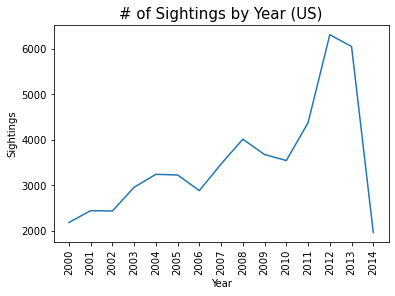

In [15]:
ufo_us_2000 = ufo_us[ufo_us['year'] >= '2000']

count_ufo_us_2000 = ufo_us_2000['year'].value_counts().sort_index()

import matplotlib.pyplot as plt

plt.plot(count_ufo_us_2000)
plt.title('# of Sightings by Year (US)', fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Sightings')
plt.xticks(rotation = 90)
plt.show()

Which states report the most UFO sightings? What do you think about this?

'california' saw the most sightings with a total of 8,912 or 13.7% of total sightings. Two factors I believe may play into this are that it is the most populous state and moving east away from the coast, the desert terrain offers clearer skies for sightings. 

In [17]:
ufo_us['state_full'].value_counts().head(10)

California      8912
Washington      3966
Florida         3835
Texas           3447
New York        2980
Illinois        2499
Arizona         2414
Pennsylvania    2366
Ohio            2275
Michigan        1836
Name: state_full, dtype: int64

In [18]:
round(ufo_us['state_full'].value_counts(normalize = True).head(10), 3) * 100

California      13.7
Washington       6.1
Florida          5.9
Texas            5.3
New York         4.6
Illinois         3.8
Arizona          3.7
Pennsylvania     3.6
Ohio             3.5
Michigan         2.8
Name: state_full, dtype: float64

What time of day did most sightings occur?

To better visualize this, I created a new column called `time_category` which bins the `datetime` column into the following categories:

- 0:00 - 3:59
- 4:00 - 7:59
- 8:00 - 11:59
- 12:00 - 15:59
- 16:00 - 19:59
- 20:00 - 23:59

There were a total of 31,836 sightings or 48.9% of total sightings during the 8:00 PM - 11:59 PM bin. This may be due to the requirement of darkness to better see anomalies in the sky. 

In [19]:
ufo_us['time_category'] = pd.to_datetime(ufo_us['datetime'])

ufo_us['time_category'] = pd.cut(ufo_us['time_category'].dt.hour, bins = [0, 4, 8, 12, 16, 20, 24]
                                 , labels = ['00:00-03:59', '04:00-7:59', '8:00-11:59', '12:00-15:59', '16:00-19:59', '20:00-23:59']
                                 , right=False)

In [23]:
count_time = ufo_us['time_category'].value_counts().sort_index()

count_time

00:00-03:59     9535
04:00-7:59      4286
8:00-11:59      3333
12:00-15:59     4260
16:00-19:59    11832
20:00-23:59    31836
Name: time_category, dtype: int64

In [24]:
round(ufo_us['time_category'].value_counts(normalize = True).sort_index(), 3) * 100

00:00-03:59    14.7
04:00-7:59      6.6
8:00-11:59      5.1
12:00-15:59     6.5
16:00-19:59    18.2
20:00-23:59    48.9
Name: time_category, dtype: float64

Text(0, 0.5, 'Sightings')

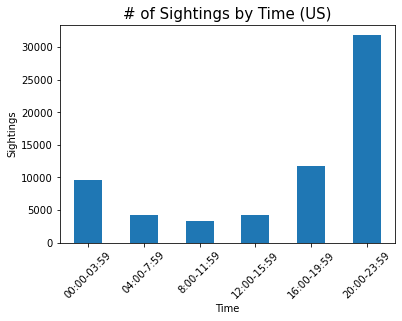

In [25]:
count_time.plot.bar()
plt.title('# of Sightings by Time (US)', fontsize = 15)
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Sightings')

What is the typical duration for a UFO sighting?

Created a new column called `duration_(minutes)` which is simply the `duration_(seconds)` converted to minutes. Placed these values on a box and whisker plot (excluding outliers).

The long upper whisker indicates that there may be a  larger variance among the greater values in the fourth quartile. `duration_(minutes)` is positively skewed. The median duration is around 3 minutes.

In [26]:
ufo_us['duration_(seconds)'] = ufo_us['duration_(seconds)'].replace('2`', '2').replace('8`', '8')
ufo_us['duration_(seconds)'] = ufo_us['duration_(seconds)'].astype('float')

In [27]:
ufo_us['duration_(minutes)'] = ufo_us['duration_(seconds)'] / 60

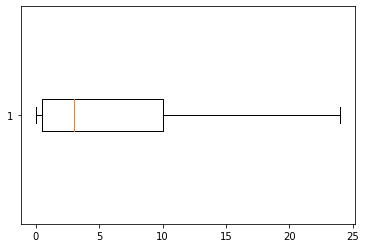

In [30]:
plt.boxplot(ufo_us['duration_(minutes)'], showfliers = False, vert = False)

plt.show()

Which months have the most sightings?

The most sightings were in 'july.' There were a total of 7,649 sightings or 11.8% of the total.

In [32]:
ufo_us_month = ufo_us['month_full'].value_counts()

ufo_us_month

July         7649
August       6825
June         6408
October      6225
September    6180
November     5664
December     4607
January      4578
March        4455
April        4443
May          4243
February     3805
Name: month_full, dtype: int64

In [33]:
round(ufo_us['month_full'].value_counts(normalize = True), 3) * 100

July         11.8
August       10.5
June          9.8
October       9.6
September     9.5
November      8.7
December      7.1
January       7.0
March         6.8
April         6.8
May           6.5
February      5.8
Name: month_full, dtype: float64

Text(0, 0.5, 'Month')

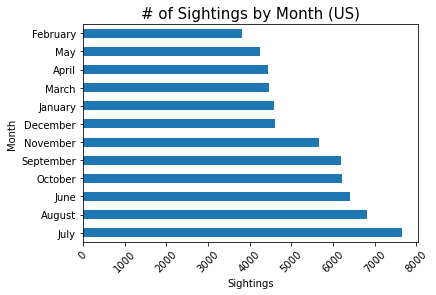

In [35]:
ufo_us_month.plot.barh()
plt.title('# of Sightings by Month (US)', fontsize = 15)
plt.xticks(rotation = 45)
plt.xlabel('Sightings')
plt.ylabel('Month')

Which words occurred most in the `comments`?

Used `.split()`, `.explode()`, and `to_list()` to create a list of all words in the `comments` column. Then, used `.most_common()` to better understand which words were used most. 

Besides the determiners, some of the most frequent words were 'light(s)', 'over', 'object', 'sky', 'moving', etc.

In [36]:
ufo_us['comments_split'] = ufo_us['comments'].str.split()
comments_split = ufo_us['comments_split'].explode().to_list()

In [46]:
from collections import Counter

pd.DataFrame(Counter(comments_split).most_common(), columns = ['word', 'count']).head(20) # to df to limit GitHub page space

,word,count
0,the,26590
1,in,25926
2,a,21815
3,and,20197
4,of,16369
5,to,12655
6,light,11451
7,lights,11205
8,over,10674
9,I,10473


Exported the `ufo_us` DataFrame to be used in the data visualization.

[Tableau Dashboard](https://public.tableau.com/views/UFOSightings_16689701565220/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

In [39]:
ufo_us.to_csv('ufo_sightings_clean.csv')